In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv('C:/Users/COMTECH COMPUTER/Desktop/Code in Juoyter/Internship (Data Science & Analytics)/Task01 (EDA on Airbnb Dataset)/AB_NYC_2019.csv')

In [52]:
data.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


# Data Insights and Handling Missing values

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [55]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [56]:
data.duplicated().sum()

np.int64(0)

In [57]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [58]:
# data.drop(columns=['last_review'], inplace=True)
data['last_review'].fillna('No Review', inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)

C:\Users\COMTECH COMPUTER\AppData\Local\Temp\ipykernel_15984\3252616141.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['last_review'].fillna('No Review', inplace=True)
C:\Users\COMTECH COMPUTER\AppData\Local\Temp\ipykernel_15984\3252616141.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [59]:
# for i in data.columns:
#     if data[i].isnull().sum() > 0:
#         data[i].fillna(0, inplace=True)
# data.drop(, axis, inplace=True/False) 
data.dropna(subset=['name', 'host_name'], inplace=True)

In [60]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Univariate Analysis

## Numerical Variables

In [64]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()



Analyzing 'id':
count    4.885800e+04
mean     1.902335e+07
std      1.098289e+07
min      2.539000e+03
25%      9.475980e+06
50%      1.969114e+07
75%      2.915765e+07
max      3.648724e+07
Name: id, dtype: float64


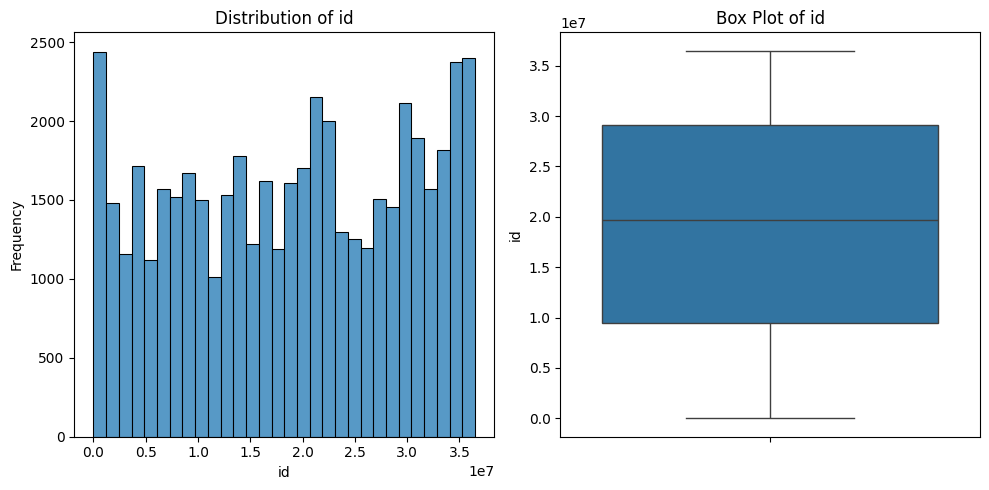


Analyzing 'host_id':
count    4.885800e+04
mean     6.763169e+07
std      7.862389e+07
min      2.438000e+03
25%      7.818669e+06
50%      3.079133e+07
75%      1.074344e+08
max      2.743213e+08
Name: host_id, dtype: float64


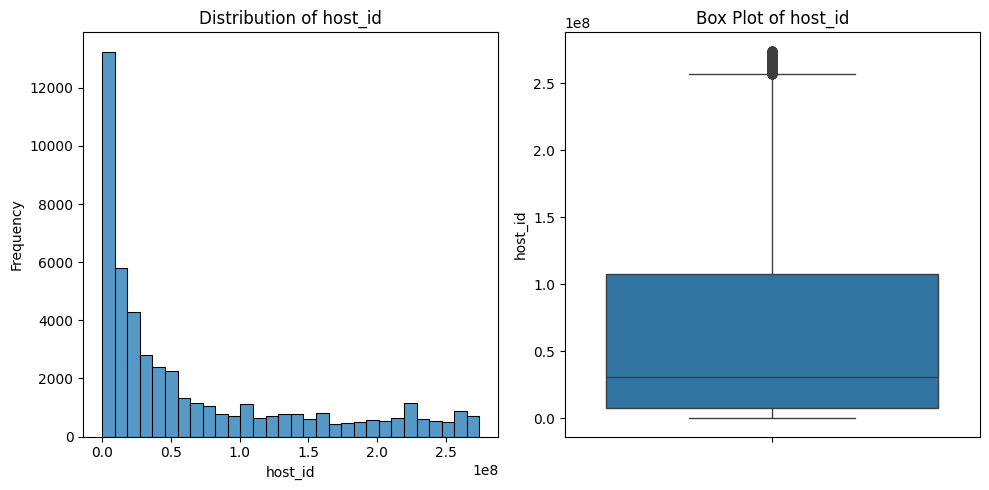

  Potential Outliers detected in 'host_id': 1525 (Upper: 1525, Lower: 0)
  Upper Outlier Threshold: 256858054.375
  Lower Outlier Threshold: -141604962.625

Analyzing 'latitude':
count    48858.000000
mean        40.728941
std          0.054528
min         40.499790
25%         40.690090
50%         40.723070
75%         40.763107
max         40.913060
Name: latitude, dtype: float64


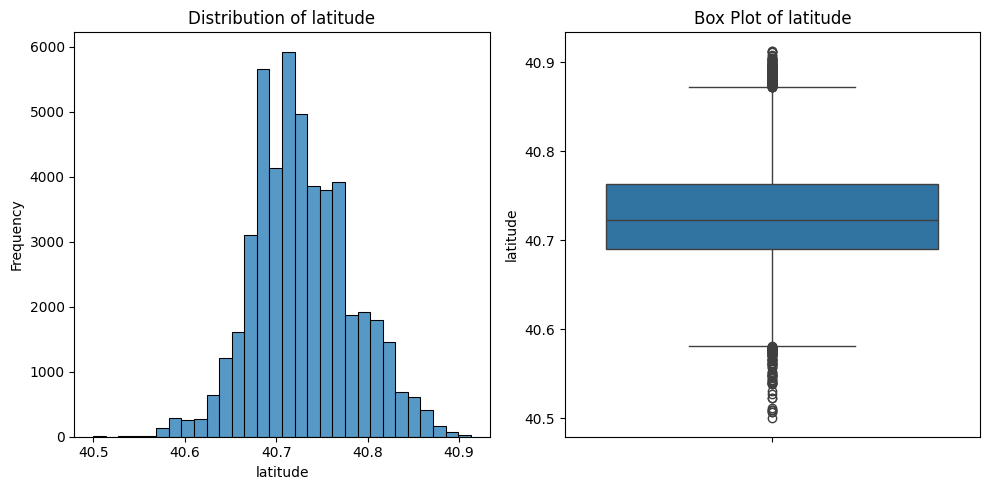

  Potential Outliers detected in 'latitude': 425 (Upper: 254, Lower: 171)
  Upper Outlier Threshold: 40.87263374999999
  Lower Outlier Threshold: 40.580563749999996

Analyzing 'longitude':
count    48858.000000
mean       -73.952170
std          0.046159
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936280
max        -73.712990
Name: longitude, dtype: float64


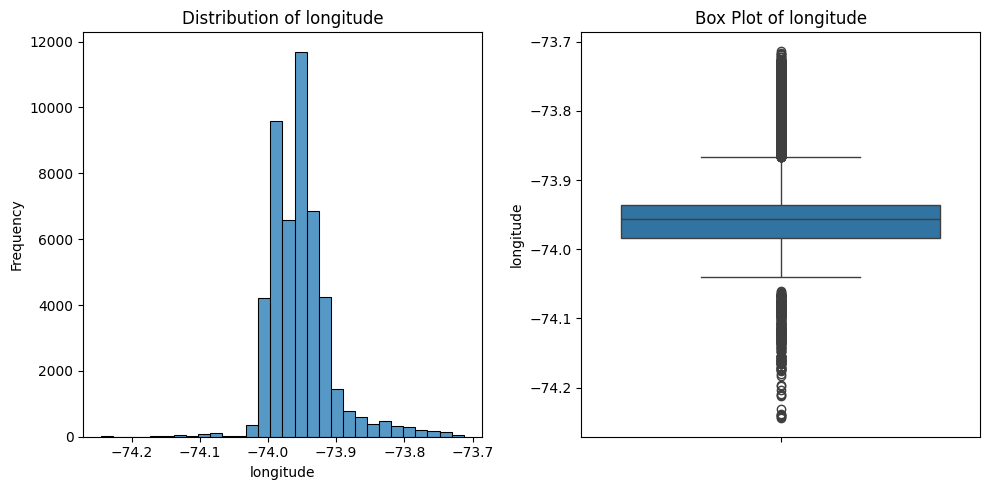

  Potential Outliers detected in 'longitude': 2832 (Upper: 2459, Lower: 373)
  Upper Outlier Threshold: -73.866095
  Lower Outlier Threshold: -74.05325500000001

Analyzing 'price':
count    48858.000000
mean       152.740309
std        240.232386
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


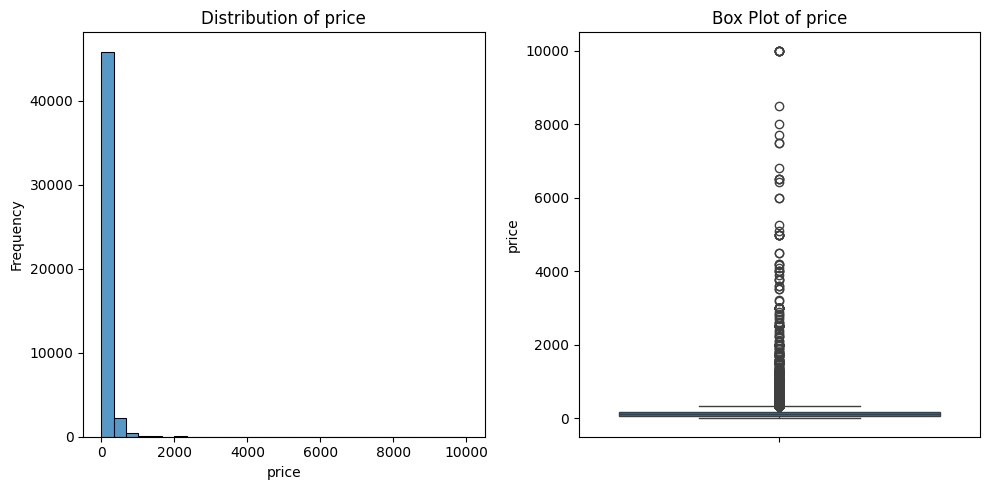

  Potential Outliers detected in 'price': 2971 (Upper: 2971, Lower: 0)
  Upper Outlier Threshold: 334.0
  Lower Outlier Threshold: -90.0

Analyzing 'minimum_nights':
count    48858.000000
mean         7.012444
std         20.019757
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


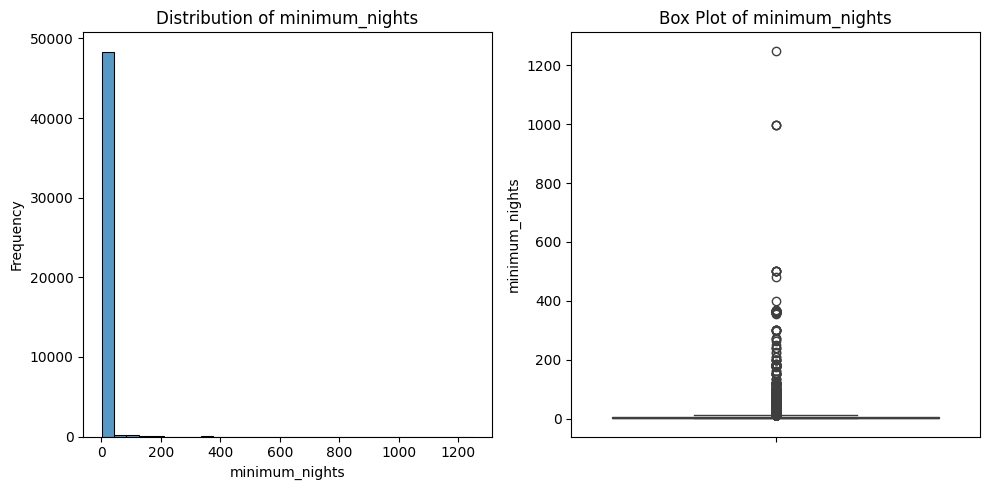

  Potential Outliers detected in 'minimum_nights': 6605 (Upper: 6605, Lower: 0)
  Upper Outlier Threshold: 11.0
  Lower Outlier Threshold: -5.0

Analyzing 'number_of_reviews':
count    48858.000000
mean        23.273098
std         44.549898
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64


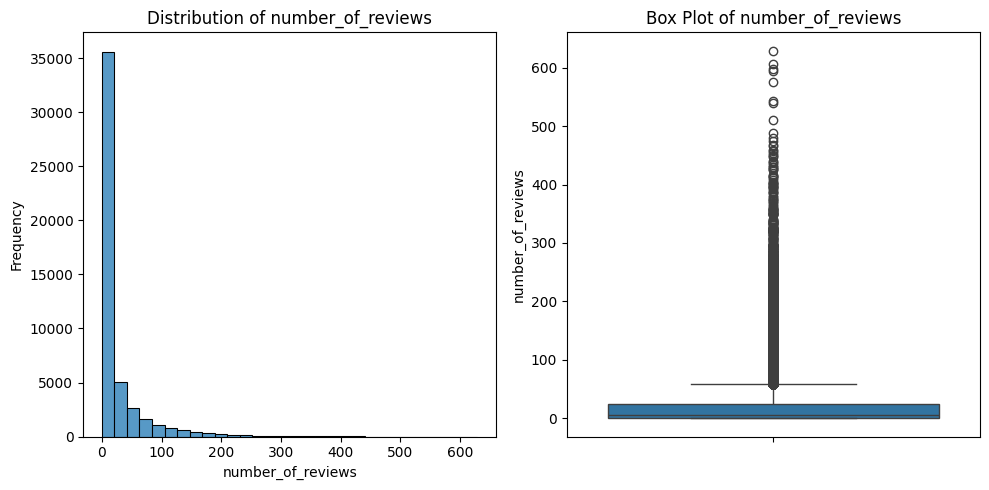

  Potential Outliers detected in 'number_of_reviews': 6015 (Upper: 6015, Lower: 0)
  Upper Outlier Threshold: 58.5
  Lower Outlier Threshold: -33.5

Analyzing 'reviews_per_month':
count    48858.000000
mean         1.091124
std          1.597270
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64


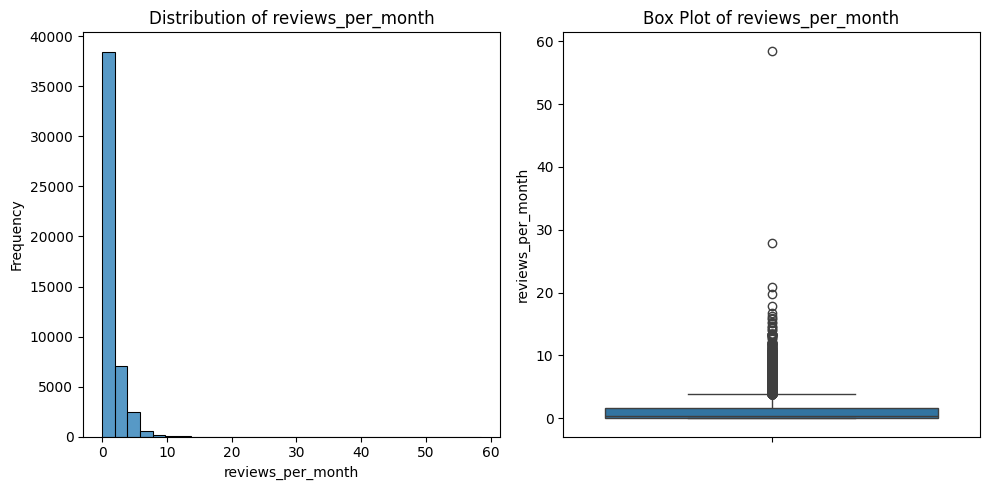

  Potential Outliers detected in 'reviews_per_month': 3309 (Upper: 3309, Lower: 0)
  Upper Outlier Threshold: 3.89
  Lower Outlier Threshold: -2.27

Analyzing 'calculated_host_listings_count':
count    48858.000000
mean         7.148369
std         32.964600
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


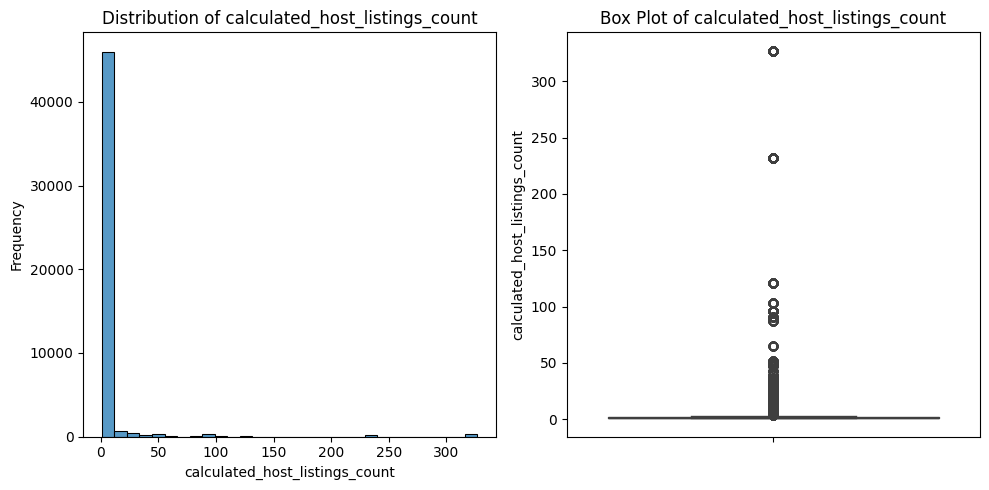

  Potential Outliers detected in 'calculated_host_listings_count': 7080 (Upper: 7080, Lower: 0)
  Upper Outlier Threshold: 3.5
  Lower Outlier Threshold: -0.5

Analyzing 'availability_365':
count    48858.000000
mean       112.801425
std        131.610962
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64


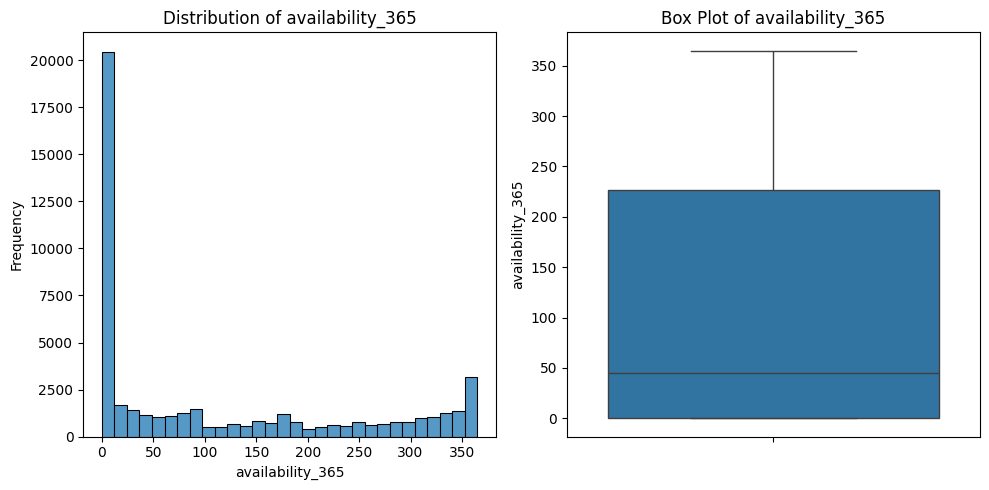

In [68]:
for col in numerical_cols:
    print(f"\nAnalyzing '{col}':")
    print(data[col].describe())

    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col].dropna(),kde=True,  bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

    # Identifying potential outliers (using IQR method for example)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold_upper = Q3 + 1.5 * IQR
    outlier_threshold_lower = Q1 - 1.5 * IQR

    num_outliers_upper = data[data[col] > outlier_threshold_upper].shape[0]
    num_outliers_lower = data[data[col] < outlier_threshold_lower].shape[0]
    total_outliers = num_outliers_upper + num_outliers_lower

    if total_outliers > 0:
        print(f"  Potential Outliers detected in '{col}': {total_outliers} (Upper: {num_outliers_upper}, Lower: {num_outliers_lower})")
        print(f"  Upper Outlier Threshold: {outlier_threshold_upper}")
        print(f"  Lower Outlier Threshold: {outlier_threshold_lower}")
        # Specific analysis for 'price' (often highly skewed)



Special analysis for 'price' distribution:


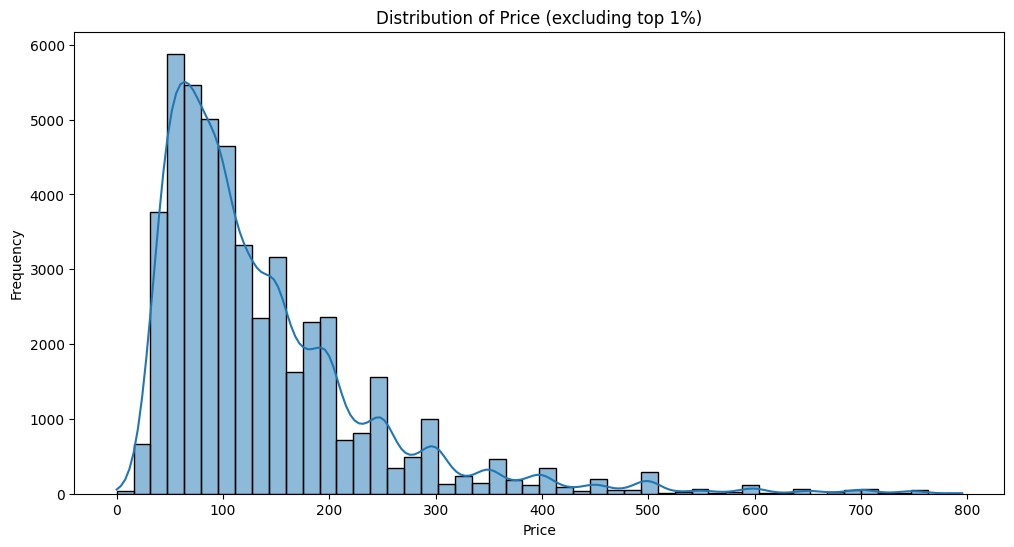

Price range: $0 - $10000
Average price: $152.74
Median price: $106.00


In [67]:
if 'price' in data.columns:
    print("\nSpecial analysis for 'price' distribution:")
    plt.figure(figsize=(12, 6))
    sns.histplot(data['price'][data['price'] < data['price'].quantile(0.99)], kde=True, bins=50) # Plotting up to 99th percentile to remove extreme outliers for better visualization
    plt.title('Distribution of Price (excluding top 1%)')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

    print(f"Price range: ${data['price'].min()} - ${data['price'].max()}")
    print(f"Average price: ${data['price'].mean():.2f}")
    print(f"Median price: ${data['price'].median():.2f}")

# Removing Outliers

In [81]:
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.01)
        Q3 = data[col].quantile(0.70)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Step 3: Apply function
data_clean_numerical = remove_outliers_iqr(data, numerical_cols)

Text(0.5, 1.0, 'Box Plot of last_review')

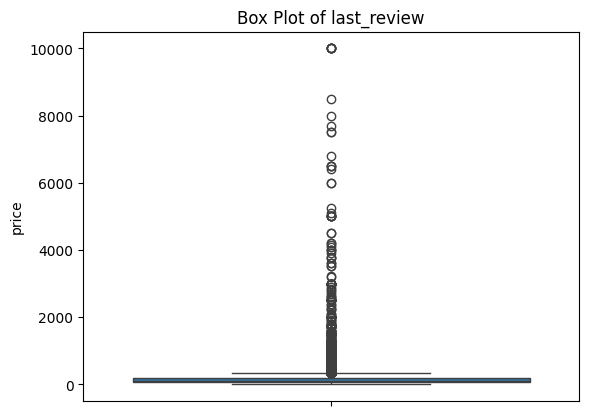

In [82]:
sns.boxplot(y=data['price'].dropna())
plt.title(f'Box Plot of {col}')

Text(0.5, 1.0, 'Box Plot of last_review')

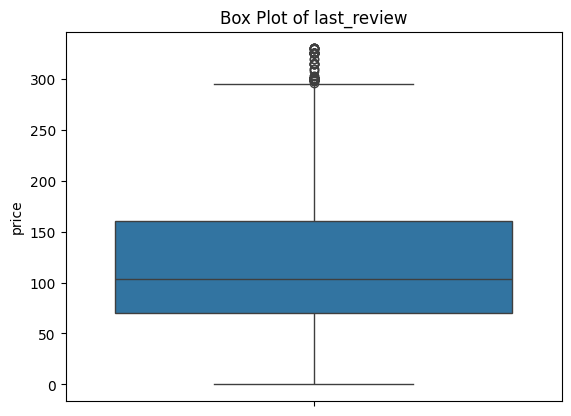

In [83]:
sns.boxplot(y=data_clean_numerical['price'].dropna())
plt.title(f'Box Plot of {col}')

## Categorical Variable


--- Univariate Analysis: Categorical Variables ---

Analyzing 'name':
name
Hillside Hotel                                     18
Home away from home                                17
New york Multi-unit building                       16
Brooklyn Apartment                                 12
Private Room                                       11
                                                   ..
Charming one bedroom - newly renovated rowhouse     1
Affordable room in Bushwick/East Williamsburg       1
Sunny Studio at Historical Neighborhood             1
43rd St. Time Square-cozy single bed                1
Large Cozy 1 BR Apartment In Midtown East           1
Name: count, Length: 47884, dtype: int64
Number of unique values: 47884
Skipping count plot for 'name' due to too many unique values.

Analyzing 'host_name':
host_name
Michael          417
David            403
Sonder (NYC)     327
John             294
Alex             279
                ... 
Pujan              1
Raheem         

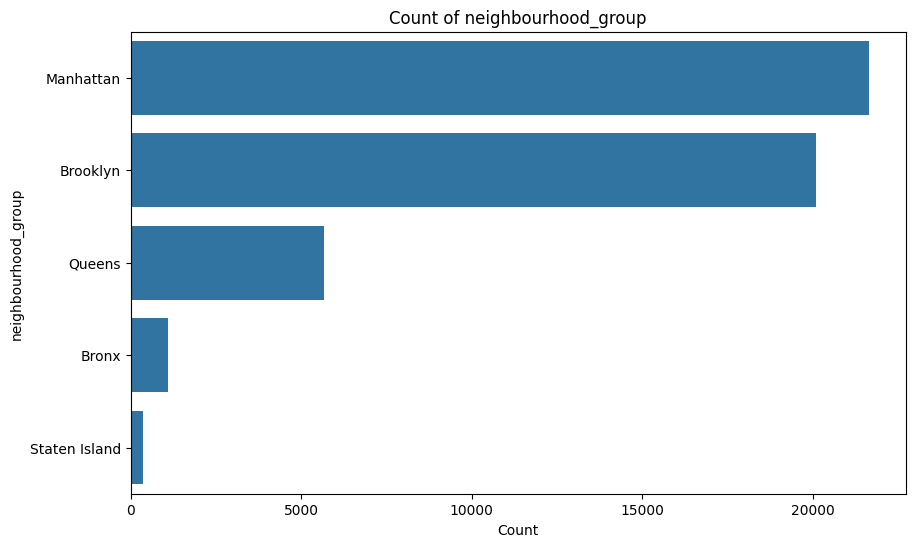


Analyzing 'neighbourhood':
neighbourhood
Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64
Number of unique values: 221
Skipping count plot for 'neighbourhood' due to too many unique values.

Analyzing 'room_type':
room_type
Entire home/apt    25393
Private room       22306
Shared room         1159
Name: count, dtype: int64
Number of unique values: 3


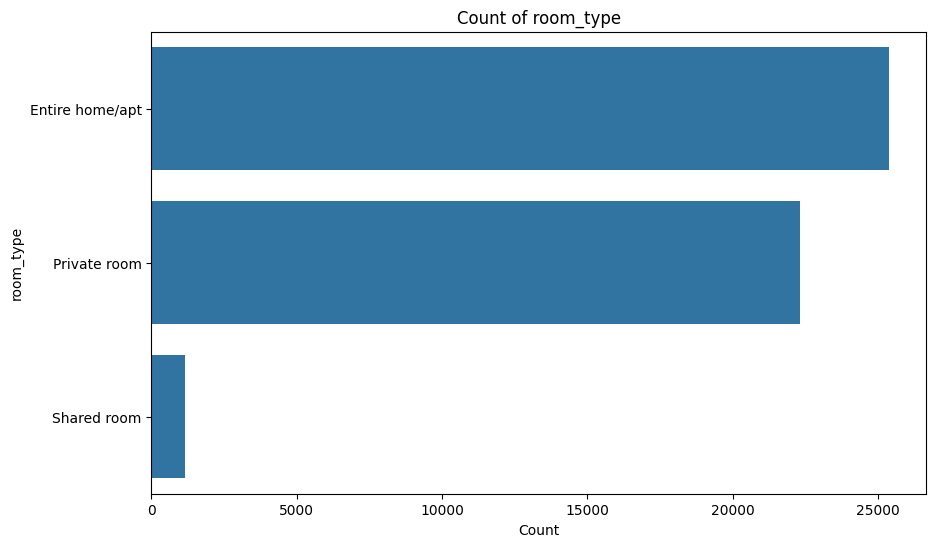


Analyzing 'last_review':
last_review
No Review     10037
2019-06-23     1413
2019-07-01     1359
2019-06-30     1341
2019-06-24      875
              ...  
2017-03-15        1
2017-02-09        1
2014-07-10        1
2014-12-22        1
2014-05-24        1
Name: count, Length: 1765, dtype: int64
Number of unique values: 1765
Skipping count plot for 'last_review' due to too many unique values.

Analysis of 'room_type':
room_type
Entire home/apt    51.973065
Private room       45.654755
Shared room         2.372181
Name: proportion, dtype: float64


C:\Users\COMTECH COMPUTER\AppData\Local\Temp\ipykernel_15984\2022229251.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='room_type', palette='viridis')


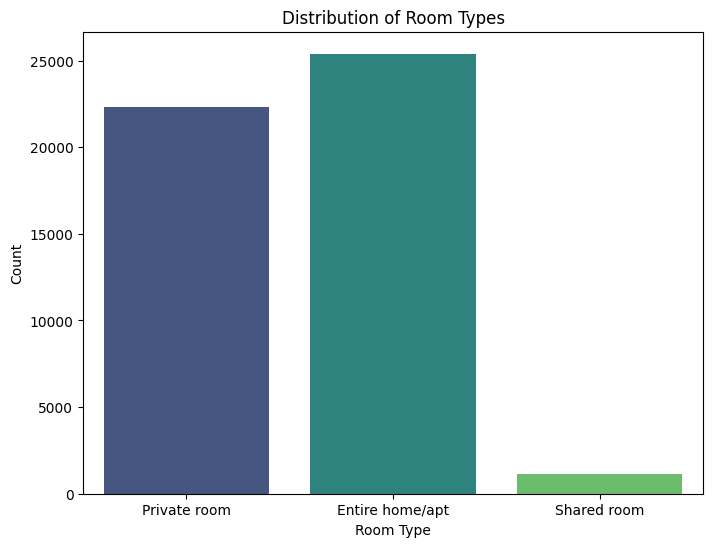


Analysis of 'neighbourhood_group':
neighbourhood_group
Manhattan        44.297761
Brooklyn         41.117115
Queens           11.592779
Bronx             2.228908
Staten Island     0.763437
Name: proportion, dtype: float64


C:\Users\COMTECH COMPUTER\AppData\Local\Temp\ipykernel_15984\2022229251.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='neighbourhood_group', palette='plasma')


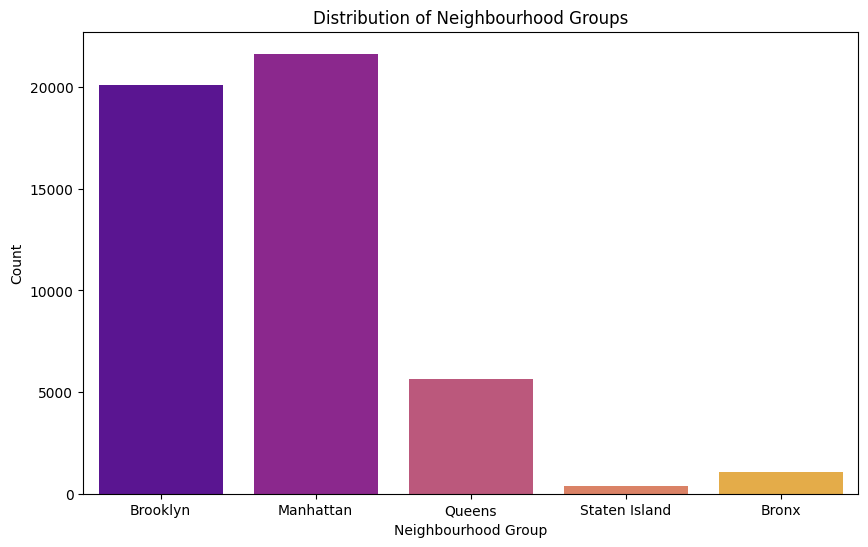

In [69]:
print("\n--- Univariate Analysis: Categorical Variables ---")

categorical_cols = data.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    print(f"\nAnalyzing '{col}':")
    print(data[col].value_counts())
    print(f"Number of unique values: {data[col].nunique()}")

    # Plotting only if number of unique values is manageable (e.g., less than 50)
    if data[col].nunique() < 50:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, y=col, order=data[col].value_counts().index) # Use y for horizontal bars
        plt.title(f'Count of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()
    else:
        print(f"Skipping count plot for '{col}' due to too many unique values.")

# Specific analysis for 'room_type'
if 'room_type' in data.columns:
    print("\nAnalysis of 'room_type':")
    print(data['room_type'].value_counts(normalize=True) * 100) # Percentage
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x='room_type', palette='viridis')
    plt.title('Distribution of Room Types')
    plt.xlabel('Room Type')
    plt.ylabel('Count')
    plt.show()

# Specific analysis for 'neighbourhood_group' (if available)
if 'neighbourhood_group' in data.columns:
    print("\nAnalysis of 'neighbourhood_group':")
    print(data['neighbourhood_group'].value_counts(normalize=True) * 100)
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='neighbourhood_group', palette='plasma')
    plt.title('Distribution of Neighbourhood Groups')
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Count')
    plt.show()

# 5: Bivariate Analysis
It help us to understand it batter how one column is effected by another column, and its impact

 # Numerical vs. Numerical


--- Bivariate Analysis: Numerical vs. Numerical ---


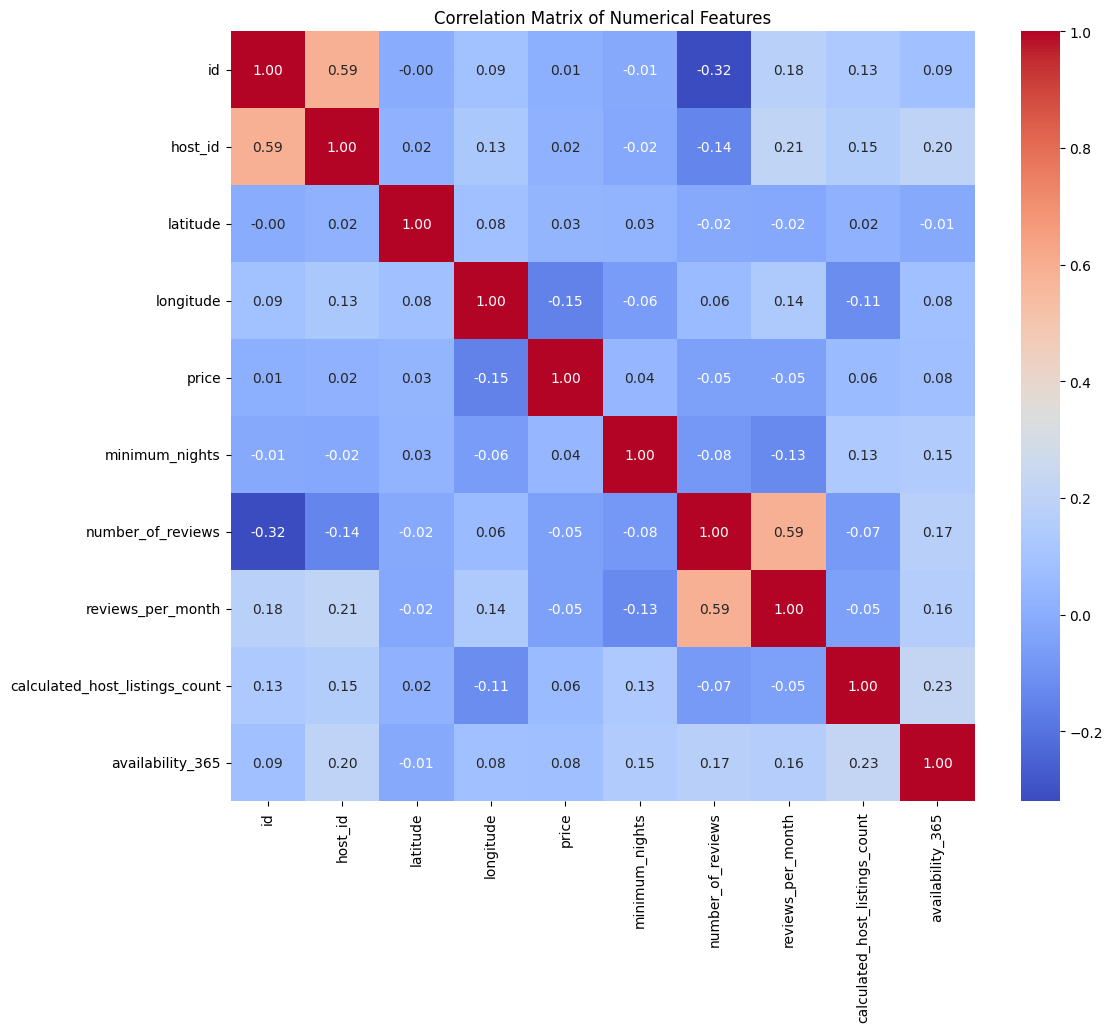


Price vs. Number of Reviews:


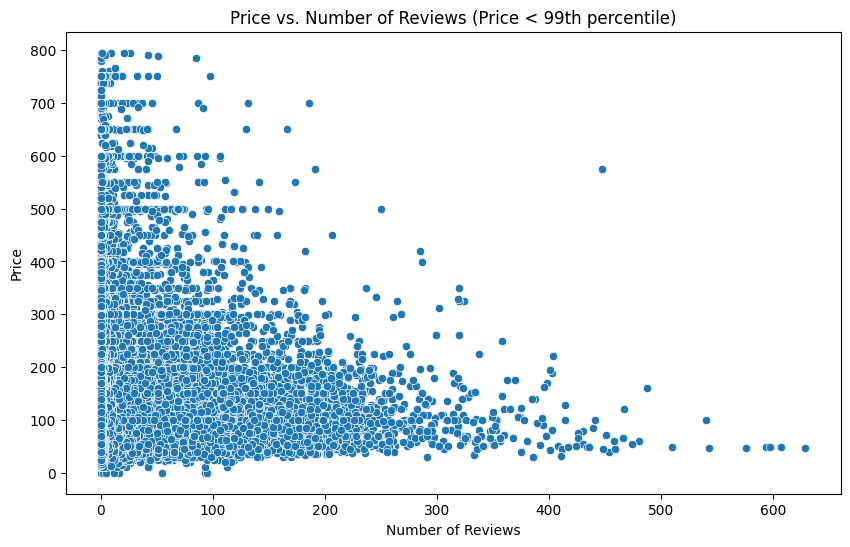


Price vs. Minimum Nights:


C:\Users\COMTECH COMPUTER\AppData\Local\Temp\ipykernel_15984\3252320603.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(x='minimum_nights', y='price', data=data[data['minimum_nights'] < 365][data['price'] < data['price'].quantile(0.99)])


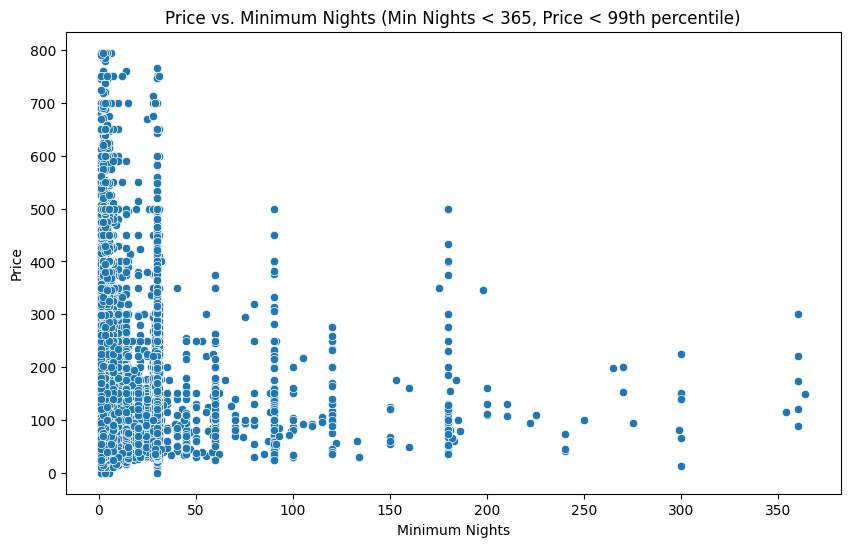

In [70]:
print("\n--- Bivariate Analysis: Numerical vs. Numerical ---")

# Correlation Heatmap for numerical columns
if len(numerical_cols) > 1:
    plt.figure(figsize=(12, 10))
    sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

# Scatter plots for key relationships (e.g., price vs. number_of_reviews)
# Be cautious with plotting all combinations if there are many numerical columns.
# Focus on potentially interesting relationships.

if 'price' in data.columns and 'number_of_reviews' in data.columns:
    print("\nPrice vs. Number of Reviews:")
    plt.figure(figsize=(10, 6))
    # Using a subset of data or log transform for price for better visualization due to outliers
    sns.scatterplot(x='number_of_reviews', y='price', data=data[data['price'] < data['price'].quantile(0.99)])
    plt.title('Price vs. Number of Reviews (Price < 99th percentile)')
    plt.xlabel('Number of Reviews')
    plt.ylabel('Price')
    plt.show()

if 'minimum_nights' in data.columns and 'price' in data.columns:
    print("\nPrice vs. Minimum Nights:")
    plt.figure(figsize=(10, 6))
    # Plotting for reasonable minimum nights to avoid extreme outliers
    sns.scatterplot(x='minimum_nights', y='price', data=data[data['minimum_nights'] < 365][data['price'] < data['price'].quantile(0.99)])
    plt.title('Price vs. Minimum Nights (Min Nights < 365, Price < 99th percentile)')
    plt.xlabel('Minimum Nights')
    plt.ylabel('Price')
    plt.show()

# Categorical vs. Numerical


--- Bivariate Analysis: Categorical vs. Numerical ---

Price distribution by Room Type:


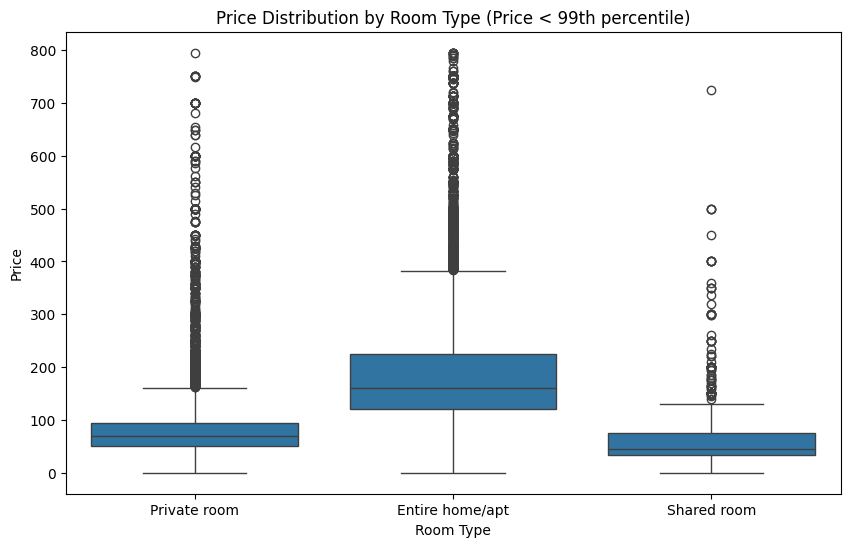


Price distribution by Neighbourhood Group:


C:\Users\COMTECH COMPUTER\AppData\Local\Temp\ipykernel_15984\3778741752.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='neighbourhood_group', y='price', data=data[data['price'] < data['price'].quantile(0.99)], palette='viridis') # Exclude top 1% prices


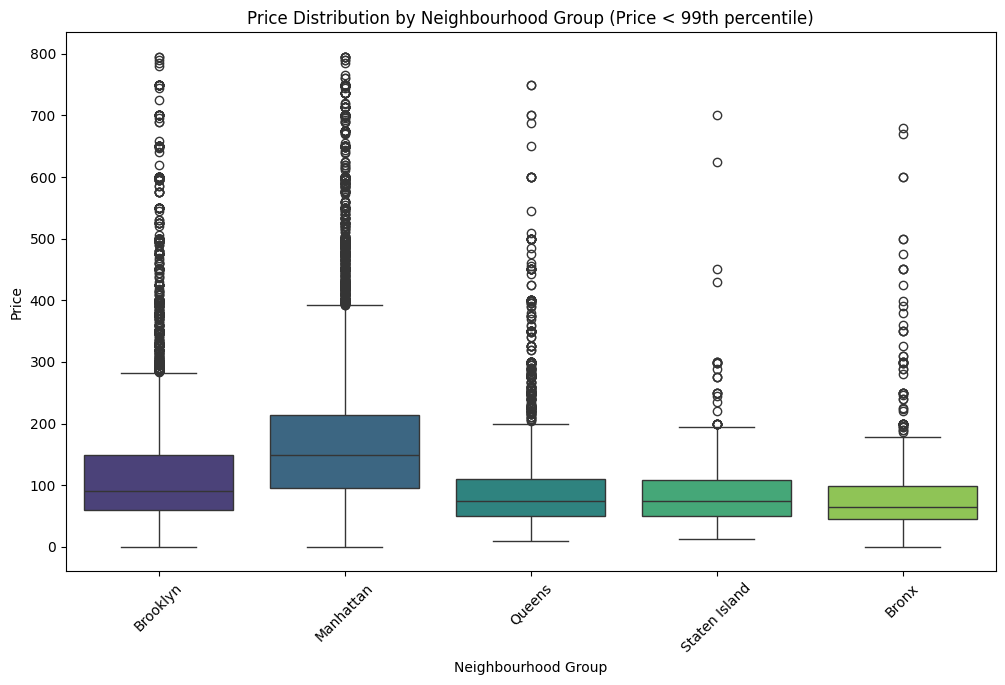


Number of Reviews by Room Type:


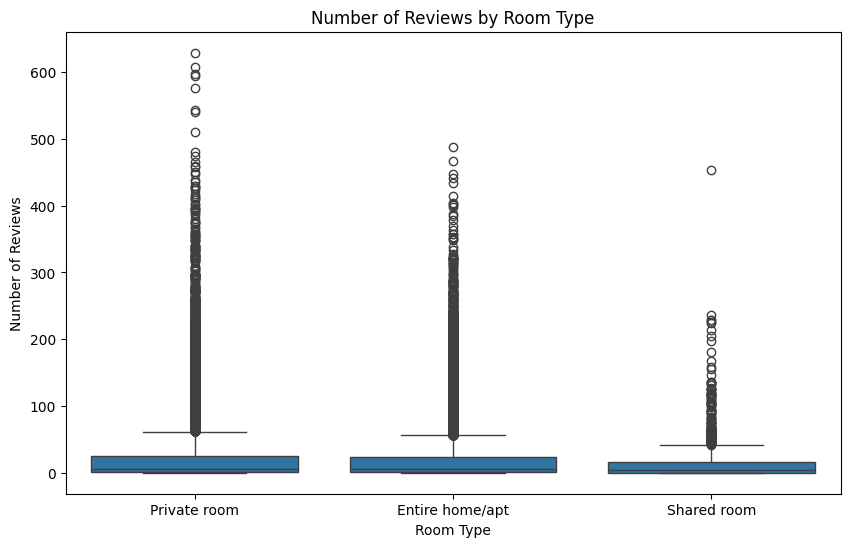

In [71]:
print("\n--- Bivariate Analysis: Categorical vs. Numerical ---")

# Price vs. Room Type
if 'room_type' in data.columns and 'price' in data.columns:
    print("\nPrice distribution by Room Type:")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='room_type', y='price', data=data[data['price'] < data['price'].quantile(0.99)]) # Exclude top 1% prices
    plt.title('Price Distribution by Room Type (Price < 99th percentile)')
    plt.xlabel('Room Type')
    plt.ylabel('Price')
    plt.show()

# Price vs. Neighbourhood Group
if 'neighbourhood_group' in data.columns and 'price' in data.columns:
    print("\nPrice distribution by Neighbourhood Group:")
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='neighbourhood_group', y='price', data=data[data['price'] < data['price'].quantile(0.99)], palette='viridis') # Exclude top 1% prices
    plt.title('Price Distribution by Neighbourhood Group (Price < 99th percentile)')
    plt.xlabel('Neighbourhood Group')
    plt.ylabel('Price')
    plt.xticks(rotation=45) # Rotate labels if they overlap
    plt.show()

# Number of Reviews vs. Room Type
if 'room_type' in data.columns and 'number_of_reviews' in data.columns:
    print("\nNumber of Reviews by Room Type:")
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='room_type', y='number_of_reviews', data=data)
    plt.title('Number of Reviews by Room Type')
    plt.xlabel('Room Type')
    plt.ylabel('Number of Reviews')
    plt.show()

# Geospatial Analysis 
Airbnb data often includes latitude and longitude, which allows for geographical insights.


--- Geospatial Analysis ---


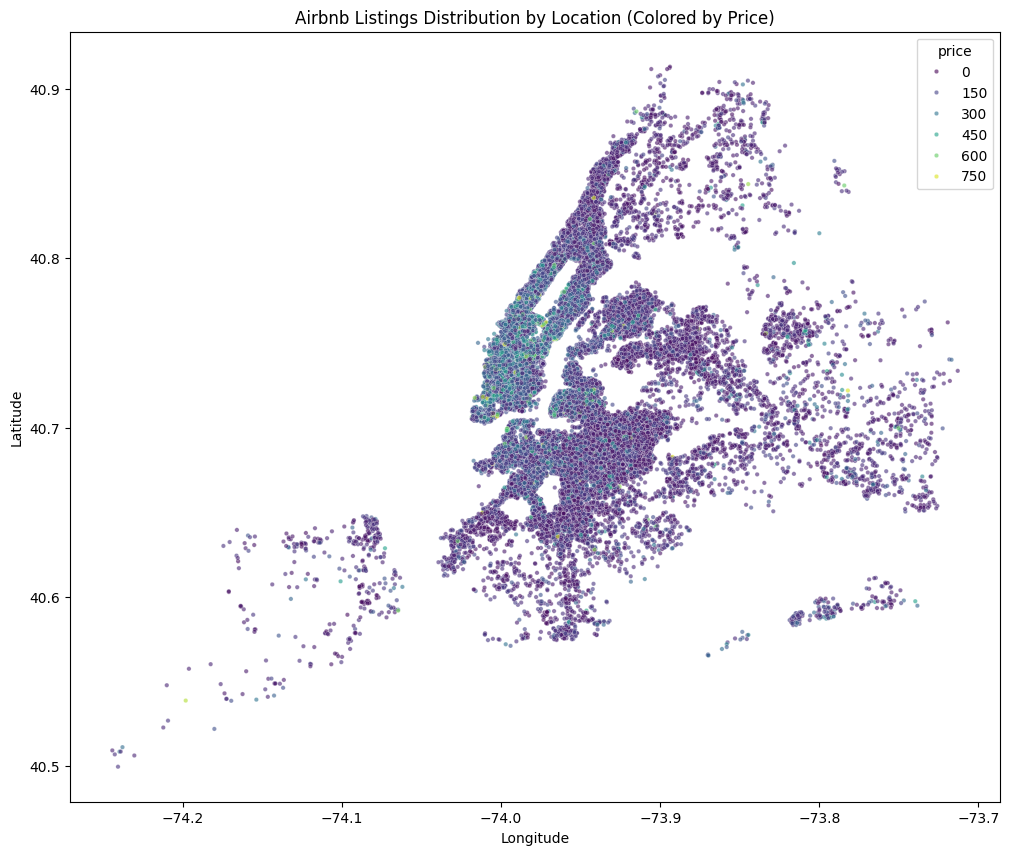

In [72]:
if 'latitude' in data.columns and 'longitude' in data.columns and 'price' in data.columns:
    plt.figure(figsize=(12, 10))
    # Plotting with 'price' as color to see price distribution geographically
    # Using 'alpha' for transparency helps with overlapping points
    sns.scatterplot(x='longitude', y='latitude', hue='price',
                    data=data[data['price'] < data['price'].quantile(0.99)], # Exclude top 1% prices
                    palette='viridis', alpha=0.6, s=10) # s controls dot size
    plt.title('Airbnb Listings Distribution by Location (Colored by Price)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
else:
    print("Latitude, Longitude, or Price columns not found for geospatial analysis.")